# **Taller 2 - Metodos Cumputacionales 2**

**Andres Felipe Olarte Acero**

**Nicolas Barrantes Cano**

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
import datetime


# 1. Ciclo de actividad solar


In [454]:
# URL of the data file
url = "https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"

# Read the data
data = pd.read_csv(url, delim_whitespace=True, header=None, names=["Year", "Month", "Day", "SSN"],skiprows=2)

# Convert to datetime
data["Date"] = pd.to_datetime(data[["Year", "Month", "Day"]])

nuevos_datos_filtrados=data[data["Date"]<"2012-01-01"]
print(nuevos_datos_filtrados)


       Year  Month  Day   SSN       Date
0      1945      1    1  10.0 1945-01-01
1      1945      1    2   0.0 1945-01-02
2      1945      1    3   1.0 1945-01-03
3      1945      1    4   2.0 1945-01-04
4      1945      1    5  11.0 1945-01-05
...     ...    ...  ...   ...        ...
24466  2011     12   27  53.0 2011-12-27
24467  2011     12   28  62.0 2011-12-28
24468  2011     12   29  67.0 2011-12-29
24469  2011     12   30  58.0 2011-12-30
24470  2011     12   31  55.0 2011-12-31

[24471 rows x 5 columns]


# 1.1 Periodo del ciclo solar

<ipython-input-455-e358d8874b37>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(frecuencias,abs(fourier_datos) ,'-r',color='black',lw=1,label='Model')


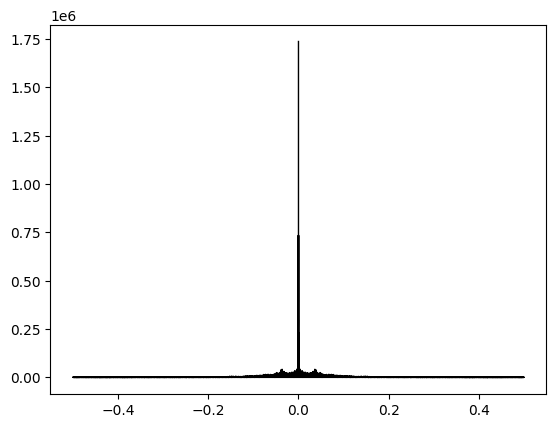

In [455]:
fourier_datos=np.fft.fft(nuevos_datos_filtrados["SSN"])
frecuencias=np.fft.fftfreq(len(nuevos_datos_filtrados["SSN"]))

plt.plot(frecuencias,abs(fourier_datos) ,'-r',color='black',lw=1,label='Model')

plt.show()



In [456]:
peak,data=sig.find_peaks(fourier_datos, 70000)
frec_ciclo=frecuencias[peak[0]]
periodo_dias=1/frec_ciclo
periodo_años=periodo_dias/365
print("La frecuencia del ciclo es de "+str(frec_ciclo)+ " ciclos por día")
print("El periodo del ciclo en días es " +str(periodo_dias)+ " días")
print("El periodo del ciclo en años es " +str(periodo_años)+ " años")



La frecuencia del ciclo es de 0.000245188181929631 ciclos por día
El periodo del ciclo en días es 4078.5 días
El periodo del ciclo en años es 11.173972602739726 años


/usr/local/lib/python3.10/dist-packages/scipy/signal/_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


# 1.2 Filtro pasabajas
1.2.a Gráfica transformada (log10|Transformada| vs log10|frecuencia|)
Gráfica transformada filtrada (log10|Transformada| vs log10|frecuencia|)

<ipython-input-457-4112cab8261e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(frecuencias,abs(fourier_filtrada) ,'-r',color='black',lw=1,label='Model')


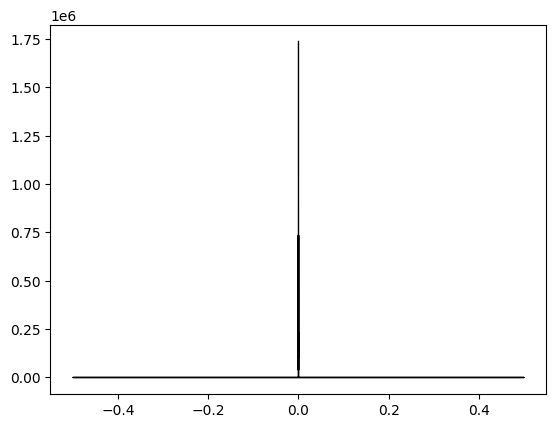

<ipython-input-457-4112cab8261e>:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(fourier_datos),'-r',color='black',lw=1,label='Model')
<ipython-input-457-4112cab8261e>:7: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(fourier_datos),'-r',color='black',lw=1,label='Model')
<ipython-input-457-4112cab8261e>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.log10(frecuencias),np.log10(fourier_datos),'-r',color='black',lw=1,label='Model')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


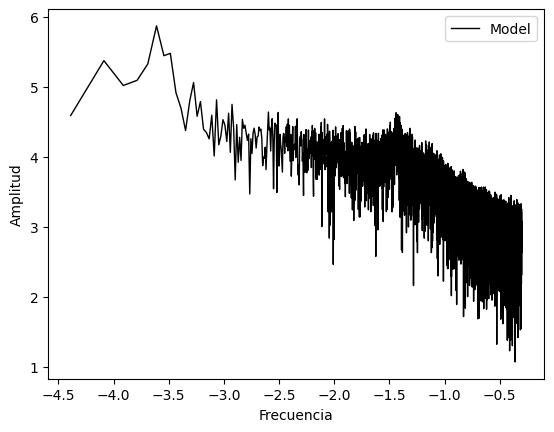

<ipython-input-457-4112cab8261e>:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(fourier_filtrada),'-r',color='black',lw=1,label='Model')
<ipython-input-457-4112cab8261e>:13: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(fourier_filtrada),'-r',color='black',lw=1,label='Model')
<ipython-input-457-4112cab8261e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.log10(frecuencias),np.log10(fourier_filtrada),'-r',color='black',lw=1,label='Model')


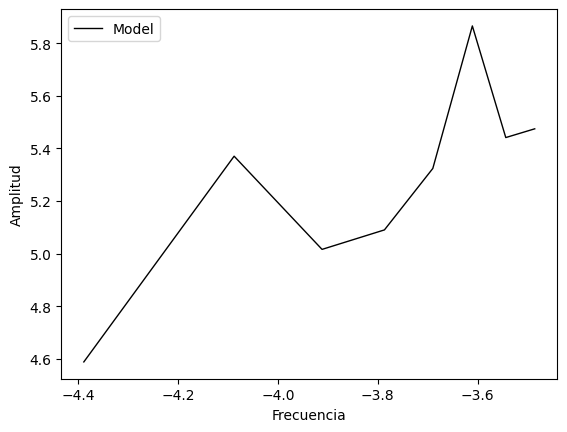

In [457]:
fc = 0.00035
filtro=np.where(abs(frecuencias) > fc, 0, 1)
fourier_filtrada=fourier_datos*filtro
plt.plot(frecuencias,abs(fourier_filtrada) ,'-r',color='black',lw=1,label='Model')
plt.show()

plt.plot(np.log10(frecuencias),np.log10(fourier_datos),'-r',color='black',lw=1,label='Model')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

plt.plot(np.log10(frecuencias),np.log10(fourier_filtrada),'-r',color='black',lw=1,label='Model')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


1.2.b
Grafica señal original y la señal filtrada.

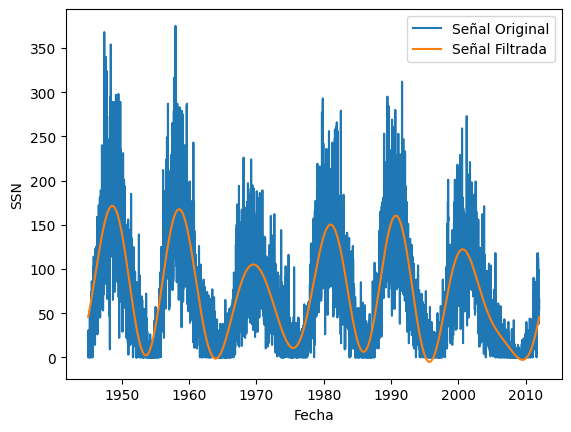

In [458]:

inversa_filtrada = np.fft.ifft(fourier_filtrada)

parte_real_filtrada = np.real(inversa_filtrada)

plt.plot(nuevos_datos_filtrados["Date"], nuevos_datos_filtrados["SSN"], label='Señal Original')
plt.plot(nuevos_datos_filtrados["Date"], parte_real_filtrada, label='Señal Filtrada')
plt.xlabel('Fecha')
plt.ylabel('SSN')
plt.legend()
plt.show()


# 1.3) Extrapolación de funciones (más o menos) periódicas

In [459]:
#Seleccionando los 10 primeros armonicos
n = 10
frec_armonicas = np.concatenate((frecuencias[:n], frecuencias[-n:]))
fourier_armonicas = np.concatenate((fourier_datos[:n], fourier_datos[-n:]))

#Array de tiempos futuros
fecha_final = datetime.date(2045, 1, 1)
fecha_inicial = nuevos_datos_filtrados["Date"].iloc[0].date()
dias2045 = (fecha_final - fecha_inicial).days
t_extrapolados = np.arange(dias2045)

In [460]:
#Extrapolacion
N = len(nuevos_datos_filtrados["SSN"])
extrapolada = np.zeros(len(t_extrapolados), dtype=complex)


for s in range(len(frec_armonicas)):
    extrapolada += fourier_armonicas[s] * np.exp(2j * np.pi * t_extrapolados * frec_armonicas[s])

extrapolada = np.real(extrapolada) / N

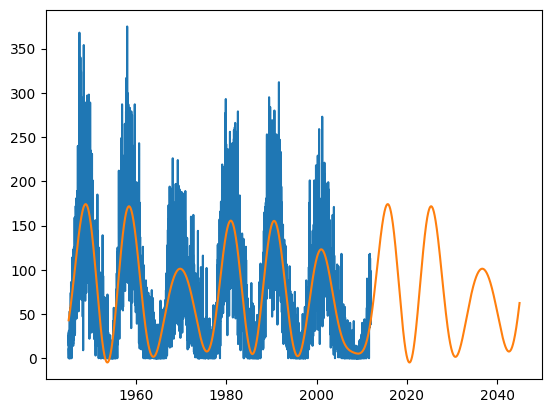

In [461]:
plt.plot(nuevos_datos_filtrados["Date"], nuevos_datos_filtrados["SSN"])
plt.plot(pd.date_range(start=nuevos_datos_filtrados["Date"].iloc[0], periods=len(t_extrapolados)), extrapolada)


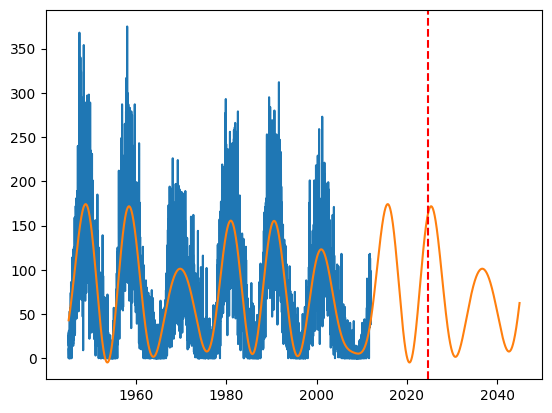

In [462]:
fecha_obj = datetime.date(2024, 8, 28)

plt.plot(nuevos_datos_filtrados["Date"], nuevos_datos_filtrados["SSN"])
plt.plot(pd.date_range(start=nuevos_datos_filtrados["Date"].iloc[0], periods=len(t_extrapolados)), extrapolada)
plt.axvline(x=pd.to_datetime(fecha_obj), color='red', linestyle='--')


**¿En qué parte del ciclo solar estamos?**

Estamos en un pico de manchas solares

**¿Cuántas manchas deberíamos esperar a mitad de Agosto?**

Deberiamos observar un aproximado de 150 manchas solares al dia

# Transformada 2D

In [464]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

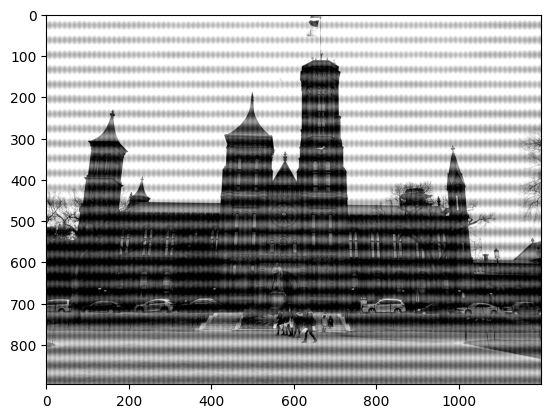

In [542]:
# Abre la imagen
img = np.array(Image.open("/content/sample_data/Noisy_Smithsonian_Castle.jpg")).astype(float)

# Grafica imagen
plt.imshow(img, cmap='gray')
plt.show()


#  2.1 Transformada de Fourier bidimensional

In [543]:
# Tranformada de Fourier de la imagen
f_trans = np.fft.fft2(img)

# Centrar imagen
f_trans_centra = np.fft.fftshift(f_trans)

# Magnitud del espectro
mag_espectro = np.log(np.abs(f_trans_centra))


Text(0.5, 1.0, 'Transformada 2D Fourier')

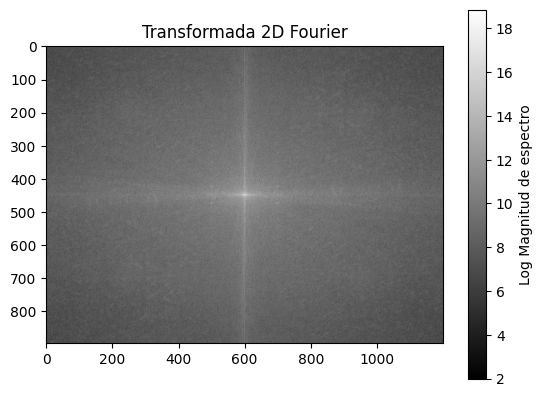

In [544]:
# Grafica Transformada
plt.imshow(mag_espectro, cmap='gray')
plt.colorbar(label='Log Magnitud de espectro')
plt.title('Transformada 2D Fourier')

# 2.2 Eliminacion del ruido periodico y grafica de la imagen sin ruido

In [545]:
# Filtro

mag_espectro[0:437, 597:603]=0

mag_espectro[461:1200, 597:603]=0

mag_espectro[448:453, 0:575]=0

mag_espectro[448:453, 625:1200]=0


Text(0.5, 1.0, 'Transformada 2D Fourier sin ruido')

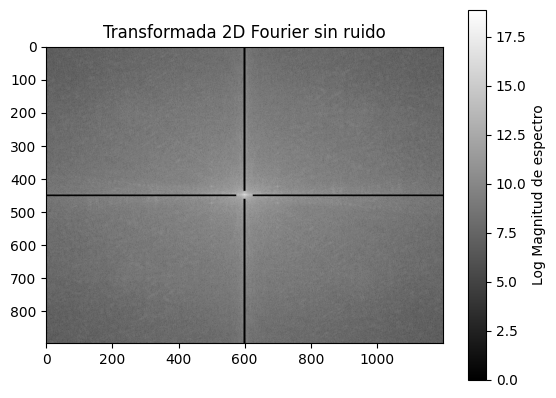

In [546]:
# Grafica transformada con filtro
plt.imshow(np.abs(mag_espectro), cmap='gray')
plt.colorbar(label='Log Magnitud de espectro')
plt.title('Transformada 2D Fourier sin ruido')

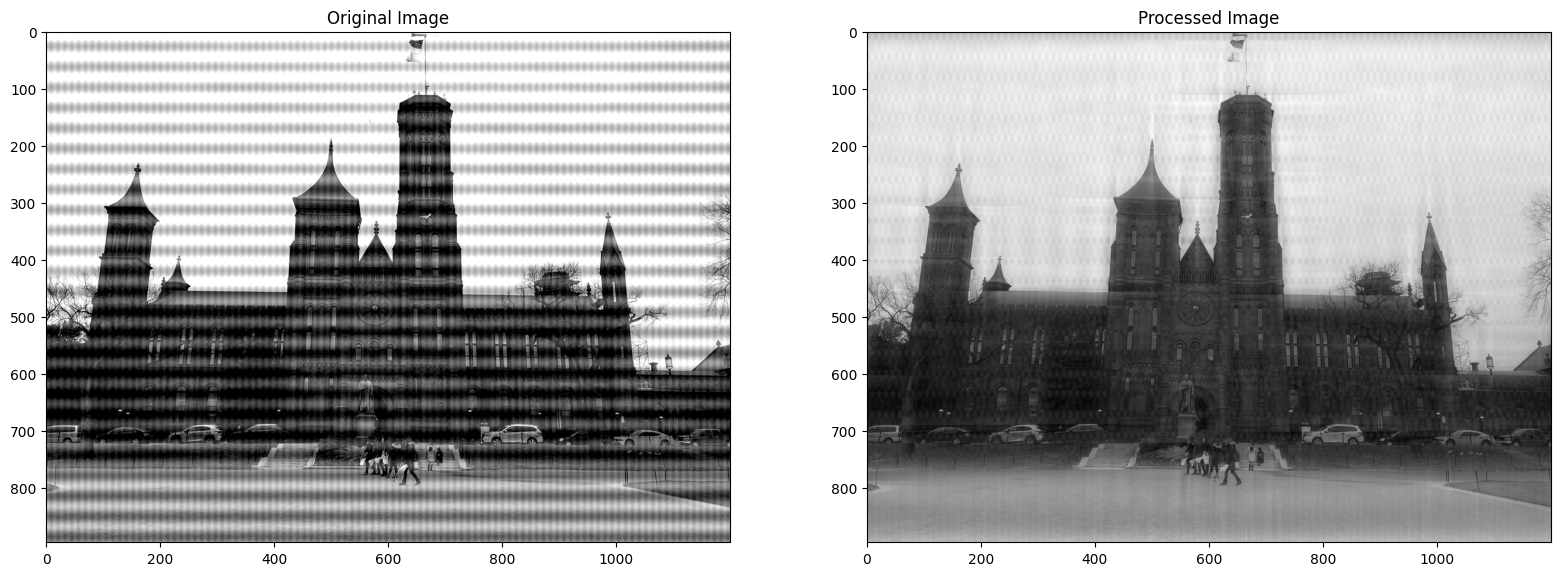

In [547]:
plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(img, "gray"), plt.title("Original Image")

X_ft = np.fft.fft2(img)


H_c = np.fft.fftshift(mag_espectro)


Y_ft = X_ft * H_c


X_new = np.fft.ifft2(Y_ft)
plt.subplot(232), plt.imshow(np.abs(X_new), "gray"), plt.title("Processed Image")

plt.show()